In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier # 분류 GradientBoosting
from lightgbm import LGBMClassifier

from lightgbm import plot_importance

from sklearn.tree import export_graphviz
import graphviz
from subprocess import call
from IPython.display import Image

import seaborn as sns
%matplotlib inline
from statsmodels.api import Logit

import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

In [5]:
df_2021_sales_raw = pd.read_csv("../cvs_data/data_result/2021_sales_raw.csv")
df_2021_sales = df_2021_sales_raw[['idUser', 'SalesDT', 'ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle', 'ItemNameMiddle', 'Price']]

In [23]:
df_2021_sales.groupby(['ItemIdLarge','ItemIdMiddle'])['Price'].agg('sum')

(ItemIdLarge  ItemIdMiddle
 L1           M1               29093100
              M2               22853400
              M3               10269000
 L2           M1                7812100
              M2                3568700
              M3                2107400
 L3           M1               48432500
              M2               60792550
              M3               39399400
 L4           M1               73636300
 L5           M1              162427580
              M2               73307500
              M3              126867220
 L6           M1               68617400
              M2                5197700
              M3               14543160
 Name: Price, dtype: int64,)

In [36]:
df_cat_priceSum = pd.DataFrame(df_2021_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('sum'))
df_cat_priceSum

Price
ItemNameLarge ItemNameMiddle           
간편식사          도시락              29093100
              샌드위치             22853400
              주먹밥              10269000
과자류           껌/초              39399400
              빵/디              60792550
              스낵               48432500
식품            가공식             162427580
              식재료             126867220
              안주류              73307500
아이스크          아이스              73636300
음료            아이스               5197700
              유제품              14543160
              음료               68617400
즉석조리          베이커               3568700
              즉석커               2107400
              튀김류               7812100

In [40]:
df_cat_priceSum.index = [large+'_'+middle for large, middle in df_cat_priceSum.index]
df_cat_priceSum

,Price
간편식사_도시락,29093100
간편식사_샌드위치,22853400
간편식사_주먹밥,10269000
과자류_껌/초,39399400
과자류_빵/디,60792550
과자류_스낵,48432500
식품_가공식,162427580
식품_식재료,126867220
식품_안주류,73307500
아이스크_아이스,73636300


<Figure size 1000x600 with 0 Axes>

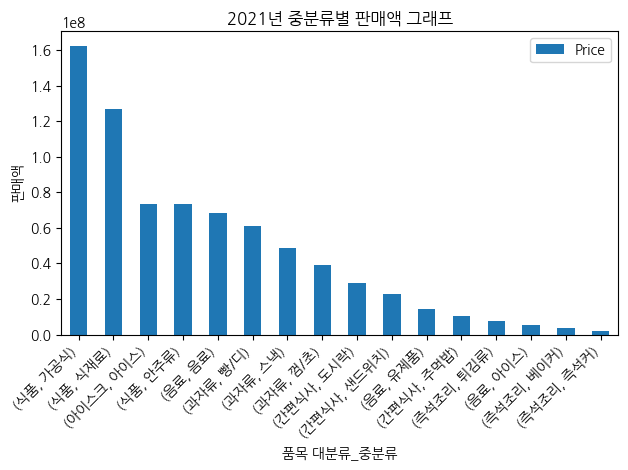

In [81]:
ax = plt.figure(figsize=(10, 6))
bars = df_cat_priceSum.sort_values(by='Price', ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액')
plt.xlabel('품목 대분류_중분류')
plt.title('2021년 중분류별 판매액 그래프')
plt.tight_layout()

# for bar, value in zip(bars,\
#                       sum(df_cat_priceSum.sort_values(by='Price', ascending=False).values.tolist(), [])):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), 
#              ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [74]:
df_2022_sales_raw = pd.read_csv("../cvs_data/data_result/2021_sales_raw.csv")
df_2022_sales = df_2022_sales_raw[['idUser', 'SalesDT', 'ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle', 'ItemNameMiddle', 'Price']]

In [75]:
df_2022_sales.groupby(['ItemIdLarge','ItemIdMiddle'])['Price'].agg('sum')

ItemIdLarge  ItemIdMiddle
L1           M1               29093100
             M2               22853400
             M3               10269000
L2           M1                7812100
             M2                3568700
             M3                2107400
L3           M1               48432500
             M2               60792550
             M3               39399400
L4           M1               73636300
L5           M1              162427580
             M2               73307500
             M3              126867220
L6           M1               68617400
             M2                5197700
             M3               14543160
Name: Price, dtype: int64

In [78]:
df_cat_priceSum_2022 = pd.DataFrame(df_2022_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('sum'))
df_cat_priceSum_2022

Price
ItemNameLarge ItemNameMiddle           
간편식사          도시락              29093100
              샌드위치             22853400
              주먹밥              10269000
과자류           껌/초              39399400
              빵/디              60792550
              스낵               48432500
식품            가공식             162427580
              식재료             126867220
              안주류              73307500
아이스크          아이스              73636300
음료            아이스               5197700
              유제품              14543160
              음료               68617400
즉석조리          베이커               3568700
              즉석커               2107400
              튀김류               7812100

In [79]:
df_cat_priceSum_2022.index = [large+'_'+middle for large, middle in df_cat_priceSum_2022.index]
df_cat_priceSum_2022

,Price
간편식사_도시락,29093100
간편식사_샌드위치,22853400
간편식사_주먹밥,10269000
과자류_껌/초,39399400
과자류_빵/디,60792550
과자류_스낵,48432500
식품_가공식,162427580
식품_식재료,126867220
식품_안주류,73307500
아이스크_아이스,73636300


<Figure size 1000x600 with 0 Axes>

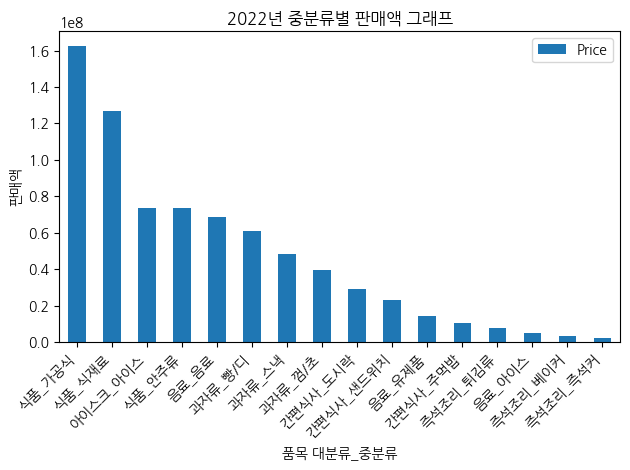

In [80]:
ax = plt.figure(figsize=(10, 6))
bars = df_cat_priceSum_2022.sort_values(by='Price', ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액')
plt.xlabel('품목 대분류_중분류')
plt.title('2022년 중분류별 판매액 그래프')
plt.tight_layout()

# for bar, value in zip(bars,\
#                       sum(df_cat_priceSum.sort_values(by='Price', ascending=False).values.tolist(), [])):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), 
#              ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [71]:
sum(df_cat_priceSum.sort_values(by='Price', ascending=False).values.tolist(), [])
# answer = sum(list_, [])

[162427580,
 126867220,
 73636300,
 73307500,
 68617400,
 60792550,
 48432500,
 39399400,
 29093100,
 22853400,
 14543160,
 10269000,
 7812100,
 5197700,
 3568700,
 2107400]

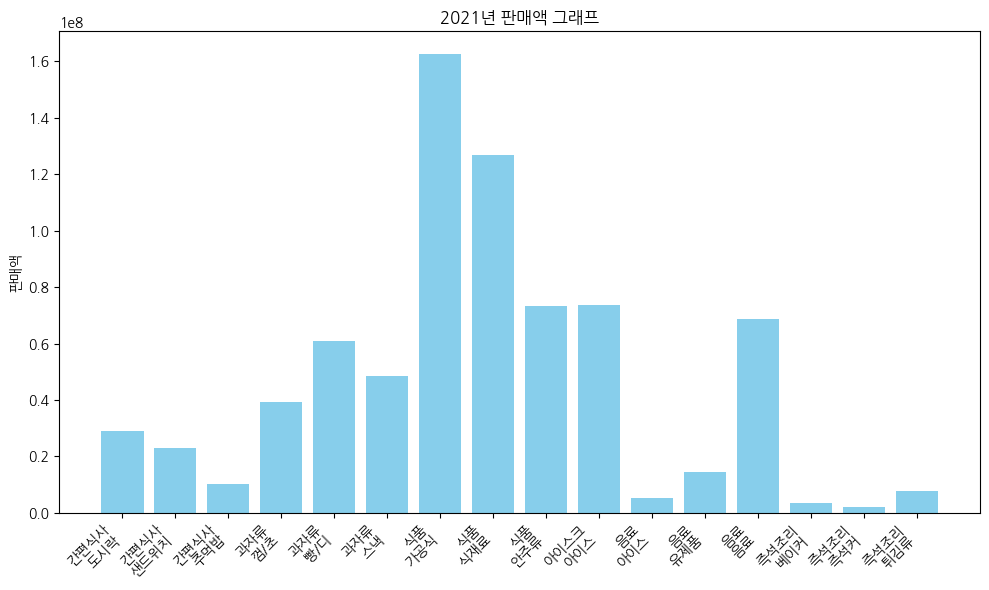

In [26]:
import matplotlib.pyplot as plt

# 주어진 데이터
data = {
    ('간편식사', '도시락'): 29093100,
    ('간편식사', '샌드위치'): 22853400,
    ('간편식사', '주먹밥'): 10269000,
    ('과자류', '껌/초'): 39399400,
    ('과자류', '빵/디'): 60792550,
    ('과자류', '스낵'): 48432500,
    ('식품', '가공식'): 162427580,
    ('식품', '식재료'): 126867220,
    ('식품', '안주류'): 73307500,
    ('아이스크', '아이스'): 73636300,
    ('음료', '아이스'): 5197700,
    ('음료', '유제품'): 14543160,
    ('음료', '음료'): 68617400,
    ('즉석조리', '베이커'): 3568700,
    ('즉석조리', '즉석커'): 2107400,
    ('즉석조리', '튀김류'): 7812100
}

# 데이터 가공
labels = [f'{large}\n{middle}' for large, middle in data.keys()]
values = list(data.values())

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액')
plt.title('2021년 판매액 그래프')
plt.tight_layout()

# 그래프 출력
plt.show()